In [21]:
import requests
import json
import html
from bs4 import BeautifulSoup
import pandas as pd
import re
from IPython.display import HTML
from IPython.display import Image
from plotnine import *
from plotnine.data import *
import matplotlib.pyplot as plt

ENGLAND

In [22]:
# I want to use the Wikipedia API to get the html for the page that lists current sitting England MPs
eng_page_key = 'List_of_MPs_for_constituencies_in_England_(2019–present)'
eng_page_endpoint = 'page/' + eng_page_key + '/html'
stem_url = 'https://en.wikipedia.org/w/rest.php/v1/'
universal_url = 'https://en.wikipedia.org/wiki/'
headers = {'User-Agent': 'Student Project'}

eng_url = stem_url + eng_page_endpoint

def get_html(url):
    r = requests.get(url, headers=headers)
    s = BeautifulSoup(r.text)
    return s

# I want to get a list of all the wikitables on the page
def get_wikitables(s):
    wikitables = s.find_all('table', class_='wikitable')
    return wikitables

# I want to get only the 3rd, 5th, 7th, 9th, 11th, 13th, 15th, 17th and 19th tables in one list
england_mp_wikitables = get_wikitables(get_html(eng_url))[2:20:2]
england_mp_wikitables

# I want to get the links from the mp tables and put them in a list
eng_names = [link.text for table in england_mp_wikitables for link in table.find_all('span', class_='fn')]
eng_names = [link.replace(" ", "_") for link in eng_names]
eng_links = [link.find('a')['href'] for table in england_mp_wikitables for link in table.find_all('span', class_='fn')]
england_mp_links = [link.replace("./", universal_url) for link in eng_links]
england_mp_links





['https://en.wikipedia.org/wiki/Bim_Afolami',
 'https://en.wikipedia.org/wiki/Peter_Aldous',
 'https://en.wikipedia.org/wiki/David_Amess',
 'https://en.wikipedia.org/wiki/Richard_Bacon_(politician)',
 'https://en.wikipedia.org/wiki/Kemi_Badenoch',
 'https://en.wikipedia.org/wiki/Duncan_Baker',
 'https://en.wikipedia.org/wiki/Steve_Barclay_(politician)',
 'https://en.wikipedia.org/wiki/John_Baron_(politician)',
 'https://en.wikipedia.org/wiki/Paul_Bristow',
 'https://en.wikipedia.org/wiki/Anthony_Browne_(politician)',
 'https://en.wikipedia.org/wiki/Alex_Burghart',
 'https://en.wikipedia.org/wiki/James_Cartlidge',
 'https://en.wikipedia.org/wiki/Jo_Churchill',
 'https://en.wikipedia.org/wiki/James_Cleverly',
 'https://en.wikipedia.org/wiki/Thérèse_Coffey',
 'https://en.wikipedia.org/wiki/Daisy_Cooper',
 'https://en.wikipedia.org/wiki/Jonathan_Djanogly',
 'https://en.wikipedia.org/wiki/Nadine_Dorries',
 'https://en.wikipedia.org/wiki/Oliver_Dowden',
 'https://en.wikipedia.org/wiki/Jackie

In [23]:
# I need to get rid of the 12 MPs who have resigned or died since the last election - they are only in the england page, and are italicised in the page
page_html = get_html(eng_url).find_all('i')
relevant_lines = page_html[1:13]
resigned_MP_links = [link.get('href') for i in relevant_lines for link in i.find_all('a')]
resigned_MP_links = [link.replace("./", universal_url) for link in resigned_MP_links]
resigned_MP_links = [link.replace(" ", "_") for link in resigned_MP_links]
len(resigned_MP_links)
# I want to get rid of the resigned MPs from the list of links
england_mp_links_final = [link for link in england_mp_links if link not in resigned_MP_links]
len(england_mp_links_final)
# I encounter an issue here - there is one too few MP for England (532 instead of 533)


532

I will investigate the missing MP using TheyWorkForYou's database of sitting MPs, after completing analysis for other parts of the UK

WALES

In [24]:
# I want to use the Wikipedia API to get the html for the page that lists current sitting Welsh MPs
wal_page_key = 'List_of_MPs_for_constituencies_in_Wales_(2019–present)'
wal_page_endpoint = 'page/' + wal_page_key + '/html'
stem_url = 'https://en.wikipedia.org/w/rest.php/v1/'
universal_url = 'https://en.wikipedia.org/wiki/'
headers = {'User-Agent': 'Student Project'}

wal_url = stem_url + wal_page_endpoint

wales_mp_wikitables = get_wikitables(get_html(wal_url))[1]
wales_mp_wikitables

wal_names = [link.text for link in wales_mp_wikitables.find_all('span', class_='fn')]
wal_names = [link.replace(" ", "_") for link in wal_names]
wal_links = [link.find('a')['href'] for link in wales_mp_wikitables.find_all('span', class_='fn')]
wales_mp_links = [link.replace("./", universal_url) for link in wal_links]
len(wales_mp_links)





40

SCOTLAND

In [25]:
sco_page_key = 'List_of_MPs_for_constituencies_in_Scotland_(2019–present)'
sco_page_endpoint = 'page/' + sco_page_key + '/html'
stem_url = 'https://en.wikipedia.org/w/rest.php/v1/'
universal_url = 'https://en.wikipedia.org/wiki/'
headers = {'User-Agent': 'Student Project'}

sco_url = stem_url + sco_page_endpoint

scotland_mp_wikitables = get_wikitables(get_html(sco_url))[1]
scotland_mp_wikitables

# I want to get the links from the mp tables and put them in a list
sco_names = [link.text for link in scotland_mp_wikitables.find_all('span', class_='fn')]
sco_names = [link.replace(" ", "_") for link in sco_names]
sco_links = [link.find('a')['href'] for link in scotland_mp_wikitables.find_all('span', class_='fn')]
scotland_mp_links = [link.replace("./", universal_url) for link in sco_links]
len(scotland_mp_links)



59

NORTHERN IRELAND

In [26]:
ni_page_key = 'List_of_MPs_for_constituencies_in_Northern_Ireland_(2019–present)'
ni_page_endpoint = 'page/' + ni_page_key + '/html'
stem_url = 'https://en.wikipedia.org/w/rest.php/v1/'
universal_url = 'https://en.wikipedia.org/wiki/'
headers = {'User-Agent': 'Student Project'}

ni_url = stem_url + ni_page_endpoint

northern_ireland_mp_wikitables = get_wikitables(get_html(ni_url))[2]
northern_ireland_mp_wikitables

# I want to get the links from the mp tables and put them in a list

ni_names = [link.text for link in northern_ireland_mp_wikitables.find_all('span', class_='fn')]
ni_names = [link.replace(" ", "_") for link in ni_names]
ni_links = [link.find('a')['href'] for link in northern_ireland_mp_wikitables.find_all('span', class_='fn')]
northern_ireland_mp_links = [link.replace("./", universal_url) for link in ni_links]
len(northern_ireland_mp_links)


18

Now I will combine the lists of links to get a Great Britain list of MPs Wikipedia links (650)

In [27]:
uk_mp_links = england_mp_links_final + wales_mp_links + scotland_mp_links + northern_ireland_mp_links
len(uk_mp_links)
# Something is wrong - there are 650 sitting MPs, but I have 649 links. I need to find out which one is missing

649

Now I return to the question of why England has one too few MPs after removing the 12 MPs who are no longer serving
I will use the TheyWorkForYou webpage for sitting MPs to crosscheck

In [28]:
pages_html = get_html('https://www.theyworkforyou.com/mps/')
mp_names_twfy = pages_html.find_all('h2', class_='people-list__person__name')
mp_names_twfy = [link.text for link in mp_names_twfy]
mp_names_twfy = [link.replace(" ", "_") for link in mp_names_twfy]
len(mp_names_twfy)
# Now using regex I want to see which name is missing from my list of 649 UK MPs
missing_by_regex = [name for name in mp_names_twfy if re.search(name, str(uk_mp_links)) == None]
missing_by_regex
# Given the nature of some names (eg Jon Ashworth vs Jonathan Ashworth) I need to find the missing MP by hand from this list of 23 anomalies identified by regex search
# I have found that the missing MP is Kim Leadbeater, who was elected in July 2021 - this is a mistake on Wikipedia's part, for not including her in the longlist of MPs at time of writing (she replaced Tracy Babin post-resignation, but her name was not added to the England list)
# I will add her to the list of links manually, but add a check in case she is added to the Wikipedia list in the future
missing_mp_link = 'https://en.wikipedia.org/wiki/Kim_Leadbeater'
def add_missing_link(link):
    if link not in uk_mp_links:
        uk_mp_links.append(link)
    else:
        pass
    return uk_mp_links

uk_mp_links_final = add_missing_link(missing_mp_link)
len(uk_mp_links_final)
# I now have 650 links, which is correct



650

Now I can begin extracting the relevant information for our UK-focused analysis, which is MP birth date and MP alma mater (university)

In [29]:
# I want to create a function that takes a link to a UK MP's Wikipedia page and returns a dictionary of their name, birth date, party and university
def get_mp_info(link):
        mp_info = {}
        mp_page_html = get_html(link)
        mp_page_infobox = mp_page_html.find('table', class_='infobox')
        try: 
            mp_info['name'] = mp_page_html.find('div', class_='fn').text
        except: 
            mp_info['name'] = None
        if mp_info['name'] == 'Nigel Evans':
            mp_info['birth date'] = '1957-11-10'
        else:
            try:
                mp_info['birth date'] = mp_page_html.find('span', class_ = 'bday').text
            except:
                mp_info['birth date'] = None
        all_mp_page_links = mp_page_infobox.find_all('a', title = True)
        try:
            mp_info['party'] = [link.text for link in all_mp_page_links if re.search('Party|Liberal Democrats|Co-operative|Sinn|Independent|Conservative|Labour|Plaid', str(link)) != None][0]
        except:
            mp_info['party'] = None
        try:
            mp_info['university'] = [link.text for link in all_mp_page_links if re.search('University|London School of Economics|Imperial|Guildhall|Malachy|, Oxford|, Cambridge|Oxford$|Cambridge$', str(link)) != None][0]
        except:
            mp_info['university'] = None
        return mp_info

# I want to test the function on a random MP
get_mp_info('https://en.wikipedia.org/wiki/Shailesh_Vara')



{'name': 'Shailesh Vara',
 'birth date': '1960-09-04',
 'party': 'Conservative',
 'university': 'Brunel University'}

Now I can get a dataframe of all sitting MPs birth date, party, alma mater and name

In [30]:
uk_mps_df = pd.DataFrame([get_mp_info(link) for link in uk_mp_links_final])
# NB takes <5 mins to run

In [31]:
uk_mps_df['birth date'] = pd.to_datetime(uk_mps_df['birth date'])
uk_mps_df.to_csv('../data/uk_mps_dataframe.csv', index=False)
uk_mps_df

,name,birth date,party,university
0,Bim Afolami,1986-02-11,Conservative,"University College, Oxford"
1,Peter Aldous,1961-08-26,Conservative,University of Reading
2,Richard Bacon,1962-12-03,Conservative,London School of Economics
3,Kemi Badenoch,1980-01-02,Conservative,University of Sussex
4,Duncan Baker,1979-11-15,Conservative Party,Nottingham Trent University
...,...,...,...,...
645,Ian Paisley Jr,1966-12-12,Democratic Unionist Party,Queen's University Belfast
646,Gavin Robinson,1984-11-22,Democratic Unionist Party,Ulster University
647,Jim Shannon,1955-03-25,Democratic Unionist Party Spokesperson for Hea...,None
648,Sammy Wilson,1953-04-04,Democratic Unionist Party Chief Whip in the Ho...,Queen's University Belfast


Now that the dataset is saved, and the dataframe has been created, we can now perform analysis on the UK data

In [32]:
uk_mps_df.info()
uk_mps_df.describe()
# Clearly we have some missing values for university (problems with the wikipedia page not containing this information)
# therefore births analysis will be limited to MPs for whom birth data is available
# university analysis will be limited to university-attendees where data is available 507/650

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   name        650 non-null    object        
 1   birth date  631 non-null    datetime64[ns]
 2   party       650 non-null    object        
 3   university  507 non-null    object        
dtypes: datetime64[ns](1), object(3)
memory usage: 20.4+ KB


/var/folders/wx/k35tcjkd3mx16xkkmzntwzrc0000gn/T/ipykernel_9454/1104141676.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.


,name,birth date,party,university
count,650,631,650,507
unique,650,617,75,178
top,Bim Afolami,1972-01-05 00:00:00,Conservative,London School of Economics
freq,1,2,295,18
first,NaN,1940-05-10 00:00:00,NaN,NaN
last,NaN,1996-08-29 00:00:00,NaN,NaN


BIRTHS ANALYSIS

In [33]:
# UN data for UK for comparison
UN_births_data=pd.read_csv('../data/Births Data UN.csv')
UN_births_data.drop(['Area', 'Record Type', 'Value Footnotes', 'Source Year'],axis=1,inplace=True)
UN_births_data=UN_births_data.query("Month in ['January','February','March','April','May','June','July','August','September','October','November','December']")
UN_births_data
# I want a subset of UN_births_data for the UK only
UK_UN_births_data = UN_births_data.loc[UN_births_data['Country or Area'] == 'United Kingdom of Great Britain and Northern Ireland']
# we have data for the period 1982 to 2020, which is acceptable
UK_UN_births_data = UK_UN_births_data.groupby('Month').sum()[['Value']].reindex(['January','February','March','April','May','June','July','August','September','October','November','December'])
UK_UN_births_data.index=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
UK_UN_births_data['uk_population_births_percentage']=(UK_UN_births_data['Value']/UK_UN_births_data['Value'].sum()*100).round(2)
UK_UN_births_data.rename(columns={'Value':'uk_un_births_count'},inplace=True)
UK_UN_births_data.transpose()



,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
uk_un_births_count,1985129.00,1819856.00,1994817.00,1935842.00,2034337.00,1995276.00,2079590.00,2037336.00,2039304.00,2028128.00,1912287.00,1918221.00
uk_population_births_percentage,8.35,7.65,8.39,8.14,8.55,8.39,8.75,8.57,8.58,8.53,8.04,8.07


In [34]:
monthly_mp_data=uk_mps_df.groupby(uk_mps_df['birth date'].dt.month).count()[['name']]
monthly_mp_data.index=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
monthly_mp_data['uk_mps_births_percentage']=(monthly_mp_data['name']/monthly_mp_data['name'].sum()*100).round(1)
monthly_mp_data.rename(columns={'name':'uk_mp_count'},inplace=True)
monthly_mp_data.transpose()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
uk_mp_count,50.0,45.0,58.0,57.0,49.0,53.0,56.0,60.0,59.0,50.0,47.0,47.0
uk_mps_births_percentage,7.9,7.1,9.2,9.0,7.8,8.4,8.9,9.5,9.4,7.9,7.4,7.4


In [35]:
merged_uk_df = pd.merge(monthly_mp_data,UK_UN_births_data,how='left',left_index=True,right_index=True)
merged_uk_df

,uk_mp_count,uk_mps_births_percentage,uk_un_births_count,uk_population_births_percentage
Jan,50,7.9,1985129.0,8.35
Feb,45,7.1,1819856.0,7.65
Mar,58,9.2,1994817.0,8.39
Apr,57,9.0,1935842.0,8.14
May,49,7.8,2034337.0,8.55
Jun,53,8.4,1995276.0,8.39
Jul,56,8.9,2079590.0,8.75
Aug,60,9.5,2037336.0,8.57
Sep,59,9.4,2039304.0,8.58
Oct,50,7.9,2028128.0,8.53


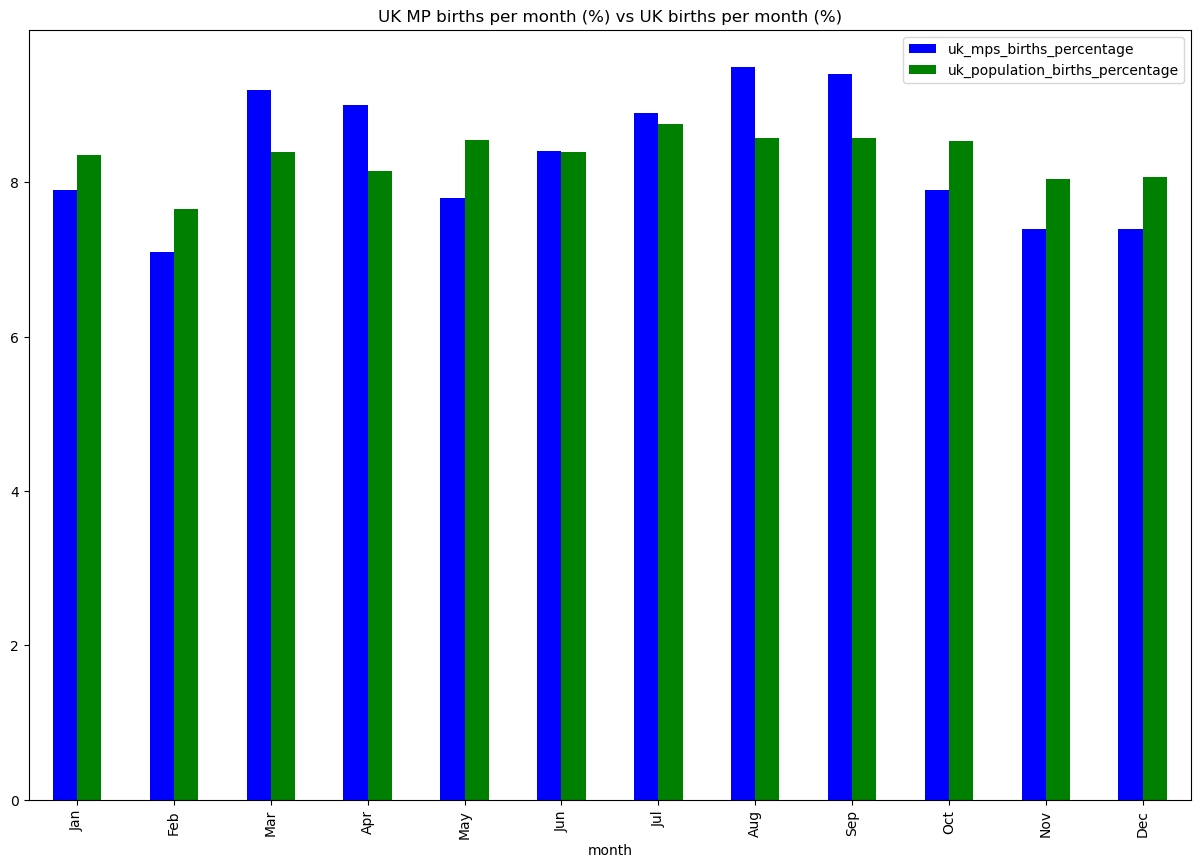

In [36]:
merged_uk_df['month'] = merged_uk_df.index
merged_uk_df['month'] = pd.Categorical(merged_uk_df['month'], categories=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], ordered=True)
merged_uk_df.plot(x='month', y=['uk_mps_births_percentage','uk_population_births_percentage'], legend=True, kind='bar', title='UK MP births per month (%) vs UK births per month (%)', figsize=(15,10), color=['blue', 'green'])
plt.show()

UNIVERSITIES ANALYSIS

In [37]:
universities_list = pd.DataFrame(uk_mps_df['university'])
universities_list.dropna(inplace=True)
universities_list.describe()
# Currently LSE is most common, but the colleges in cambridge and oxford should not be counted as separate universities
# I want to create a dataframe of only values from the universities_list that satisfy the regex search for 'Oxford$'
oxford = universities_list[universities_list['university'].str.contains('Oxford$')]
oxford
# I want to create a dataframe of only values from the universities_list that satisfy the regex search for 'Cambridge|St. John'
cambridge = universities_list[universities_list['university'].str.contains('Cambridge|St. John')]
cambridge

# I want to correct for other variants of names
universities_list.loc[universities_list['university'].str.contains('London School of Economics'), 'university'] = 'London School of Economics'

# I want to replace all values in the universities_list dataframe that are also present in the oxford dataframe with 'University of Oxford'
universities_list.loc[universities_list['university'].isin(oxford['university']), 'university'] = 'University of Oxford'

# I want to replace all values in the universities_list dataframe that are also present in the cambridge dataframe with 'University of Cambridge'
universities_list.loc[universities_list['university'].isin(cambridge['university']), 'university'] = 'University of Cambridge'

universities_ranked = pd.DataFrame(universities_list.value_counts()).reset_index()
universities_ranked.rename(columns={0:'count', 'university':'university'},inplace=True)
universities_ranked
# Now Oxford and Cambridge are correctly represented




,university,count
0,University of Oxford,75
1,University of Cambridge,47
2,London School of Economics,19
3,University of Edinburgh,12
4,University of Glasgow,12
...,...,...
118,Newcastle Polytechnic,1
119,Moray House College of Education,1
120,London South Bank University,1
121,London Metropolitan University,1


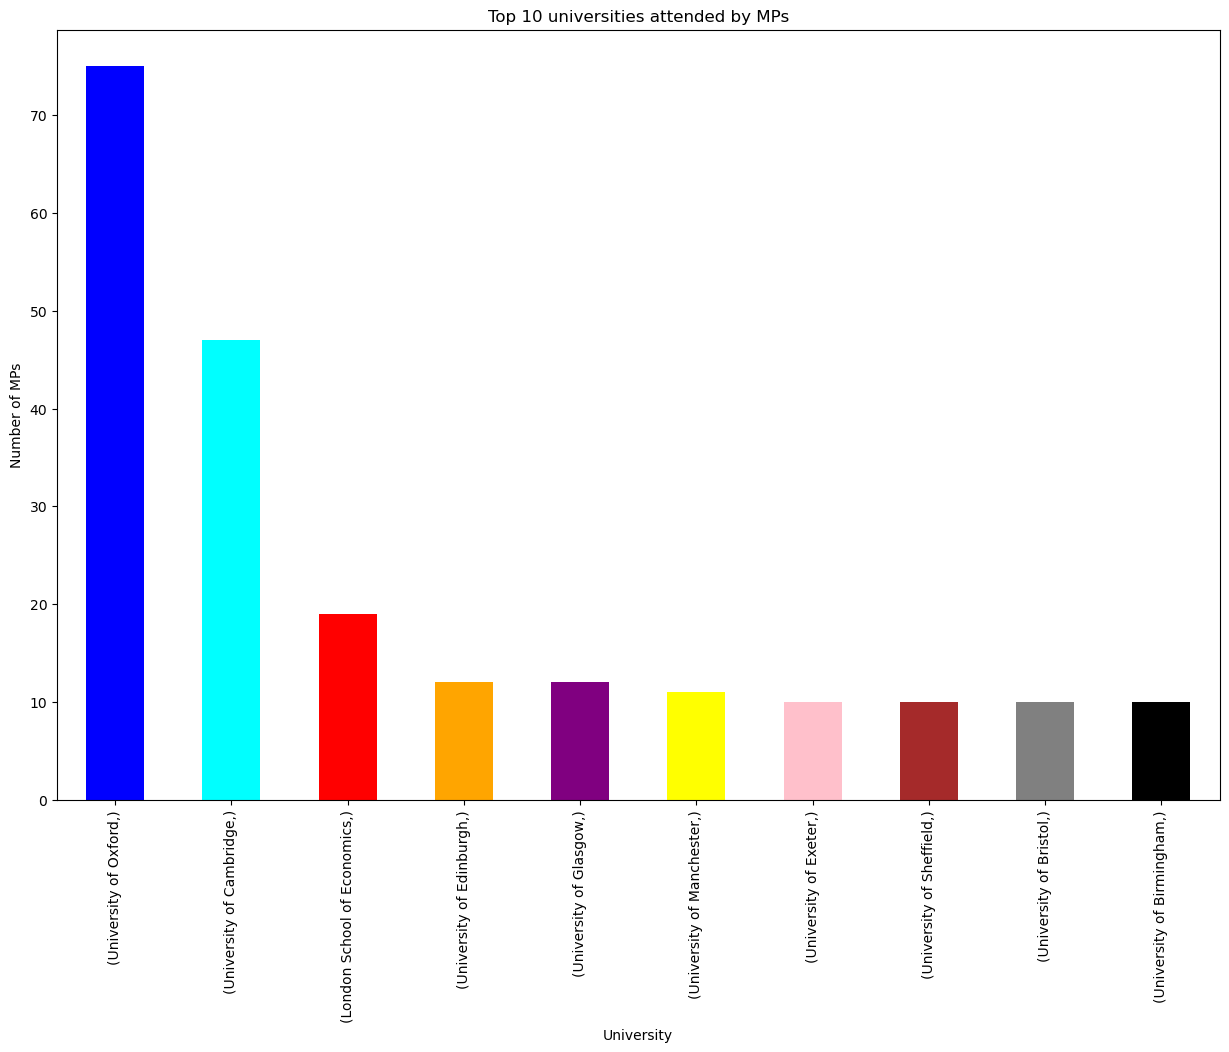

In [38]:
# Top 10 universities attended by MPs, plotted with multiple colours
universities_list.value_counts().head(10).plot(kind='bar', title='Top 10 universities attended by MPs', figsize=(15,10), color=['blue','cyan','red','orange','purple','yellow','pink','brown','grey','black'], xlabel='University', ylabel='Number of MPs')
plt.show()

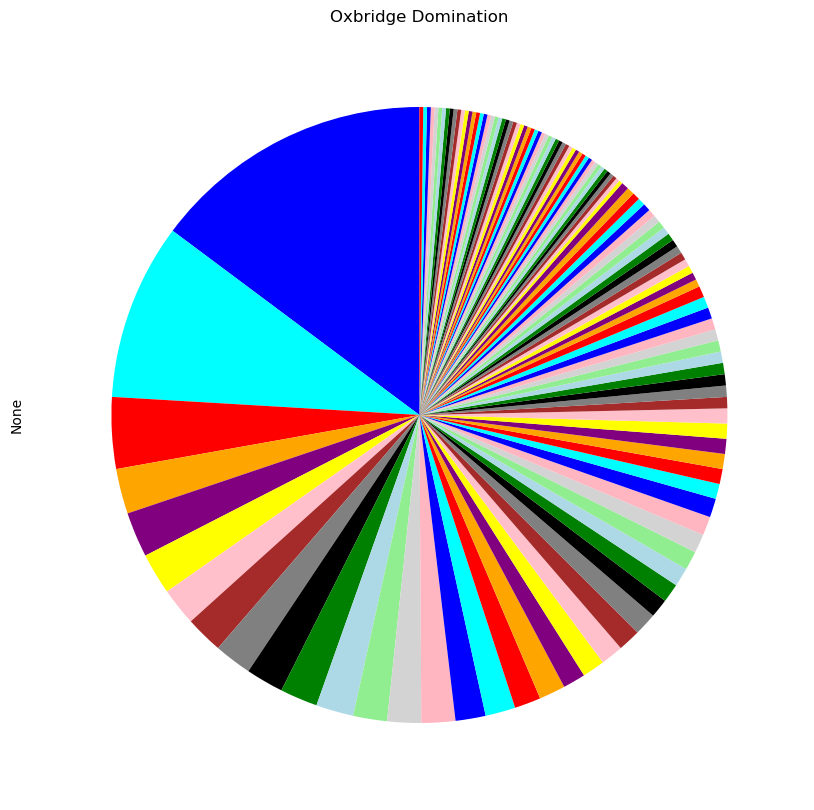

In [39]:
universities_list.value_counts().plot(kind='pie', title='Oxbridge Domination', figsize=(15,10), colors=['blue','cyan','red','orange','purple','yellow','pink','brown','grey','black','green','lightblue','lightgreen','lightgrey','lightpink'], labels=None, ylabel=None, xlabel=None, startangle=90, counterclock=True)
plt.show()

In [40]:
oxford_percentage = (universities_list.value_counts()[0:1].sum()/universities_list.value_counts().sum()*100).round(1)
print('Oxford percentage: ' + str(oxford_percentage) + '%')

cambridge_percentage = (universities_list.value_counts()[1:2].sum()/universities_list.value_counts().sum()*100).round(1)
print('Cambridge percentage: ' + str(cambridge_percentage) + '%')

oxbridge_percentage = (universities_list.value_counts().head(2).sum()/universities_list.value_counts().sum()*100).round(1)
print('Oxbridge percentage: ' + str(oxbridge_percentage) + '%')

lse_percentage = (universities_list.value_counts()[2:3].sum()/universities_list.value_counts().sum()*100).round(1)
print('LSE percentage: ' + str(lse_percentage) + '%')

Oxford percentage: 14.8%
Cambridge percentage: 9.3%
Oxbridge percentage: 24.1%
LSE percentage: 3.7%
